In [51]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import mols2grid

from rdkit import Chem

from src.utils import smi2mol
from src.config import mem
from mordred import Calculator, descriptors

In [53]:
train = pd.read_pickle('../data/processed/train_admet.pkl')

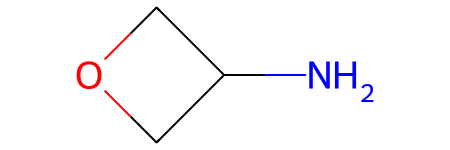

In [54]:
mol = smi2mol('NC1COC1')
mol

In [55]:
from src.fingerprints import get_fingerprints
from src.descriptors import get_rd_descriptors, get_md_descriptors
from src.representation import get_representation, get_representation_from_series

In [56]:
get_fingerprints(mol)

[20:28:04] DEPRECATION WARNING: please use MorganGenerator


0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2358    0.0
2359    0.0
2360    0.0
2361    0.0
2362    0.0
Length: 2363, dtype: float64

In [57]:
get_rd_descriptors(mol)

[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator
[20:28:04] DEPRECATION WARNING: please use MorganGenerator


rd_BalabanJ             2.079672
rd_BertzCT             33.874303
rd_Chi0                 3.698671
rd_Chi0n                2.977162
rd_Chi0v                2.977162
                         ...    
rd_fr_thiocyan          0.000000
rd_fr_thiophene         0.000000
rd_fr_unbrch_alkane     0.000000
rd_fr_urea              0.000000
rd_qed                  0.413038
Length: 200, dtype: float64

In [58]:
get_md_descriptors(mol)

md_ABC          3.644924
md_ABCGG        3.694453
md_nAcid        0.000000
md_nBase        1.000000
md_SpAbs_A      5.595865
                 ...    
md_WPol         1.000000
md_Zagreb1     22.000000
md_Zagreb2     23.000000
md_mZagreb1     1.861111
md_mZagreb2     1.166667
Length: 1826, dtype: float64

In [59]:
#X = train.smi.apply(get_representation)

In [60]:
# from src.utils import apply_mp
# 
# X_mp = apply_mp(train.smi, get_representation)

In [61]:
X = mem.cache(get_representation_from_series, ignore=['n_jobs'])(train.smi, n_jobs=24)
X.shape

(7939, 4389)

In [62]:
def drop_nans_non_unique(df):
    df.dropna(axis=1, inplace=True)
    df = df.loc[:, df.nunique() > 1].copy()
    return df

In [63]:
# X.dropna(axis=1, inplace=True)
# X.shape

In [64]:
# (X.nunique() == 1).sum()

In [65]:
# X = X.loc[:, X.nunique() > 1]
# X.shape

In [66]:
# from src.utils import get_fps_offset

# FPS_SIZE = get_fps_offset(X.columns)

In [67]:
# (X.iloc[:, FPS_SIZE:] == 0).all().sum()

In [68]:
# X.columns[FPS_SIZE:]

### split dataset

In [69]:
ids_1 = train[train.prop == 1].index
ids_2 = train[train.prop == 2].index
ids_3 = train[train.prop == 3].index

In [70]:
X_train_1 = X.loc[ids_1]
X_train_2 = X.loc[ids_2]
X_train_3 = X.loc[ids_3]

In [71]:
X_train_1 = drop_nans_non_unique(X_train_1)
X_train_2 = drop_nans_non_unique(X_train_2)
X_train_3 = drop_nans_non_unique(X_train_3)

In [72]:
X_train_1.to_pickle('../data/processed/X_train_1.pkl')
X_train_2.to_pickle('../data/processed/X_train_2.pkl')
X_train_3.to_pickle('../data/processed/X_train_3.pkl')

In [73]:
y_train_1 = train[train.prop == 1].target
y_train_2 = train[train.prop == 2].target
y_train_3 = train[train.prop == 3].target

In [74]:
y_train_1.to_pickle('../data/processed/y_train_1.pkl')
y_train_2.to_pickle('../data/processed/y_train_2.pkl')
y_train_3.to_pickle('../data/processed/y_train_3.pkl')

In [75]:
X_train_1.shape, X_train_2.shape, X_train_3.shape

((5094, 3456), (1424, 3812), (1421, 3534))

In [76]:
y_train_1.shape, y_train_2.shape, y_train_3.shape

((5094,), (1424,), (1421,))

# Test set

In [77]:
test = pd.read_pickle('../data/processed/test_set.pkl')

In [78]:
X_test = mem.cache(get_representation_from_series, ignore=['n_jobs'])(test.smi, n_jobs=24)

________________________________________________________________________________
[Memory] Calling src.representation.get_representation_from_series...
get_representation_from_series(id
0                    Cc1cc(=O)oc2ccc3c(c12)C1(C)OOC1(C)O3
1                                          CN(CC(O)CO)N=O
2                            O=[N+]([O-])c1ccc(OC2CO2)cc1
3                            Cn1cnc2cc([N+](=O)[O-])ccc21
4                                      CCC(CO)NCCNC(CC)CO
                              ...                        
1216    CCN(CC)C(=O)COc1cc2c(O)c3c(O)c(C)c4c(c13)C(=O)...
1217          O=C(Cc1ccc(Cl)c(Cl)c1)N1CCc2sccc2C1CN1CCCC1
1218                 CN1CCC23c4c5ccc(O)c4OC2C(=O)CCC3C1C5
1219                          Cn1nc(-c2cccc(F)c2)n(C)c1=S
1220     CCC1C(C)=NN=C(c2ccc(OC)c(OC)c2)c2cc(OC)c(OC)cc21
Name: smi, Length: 1221, dtype: object, n_jobs=24)
__________________________________get_representation_from_series - 24.6s, 0.4min


In [79]:
# X_test = X_test[X.columns]
# X_test.shape

In [80]:
ids_1 = test[test.prop == 1].index
ids_2 = test[test.prop == 2].index
ids_3 = test[test.prop == 3].index

In [81]:
X_test_1 = X_test.loc[ids_1]
X_test_2 = X_test.loc[ids_2]
X_test_3 = X_test.loc[ids_3]

In [82]:
X_test_1 = X_test_1[X_train_1.columns]
X_test_2 = X_test_2[X_train_2.columns]
X_test_3 = X_test_3[X_train_3.columns]

In [83]:
X_test_1.to_pickle('../data/processed/X_test_1.pkl')
X_test_2.to_pickle('../data/processed/X_test_2.pkl')
X_test_3.to_pickle('../data/processed/X_test_3.pkl')

In [84]:
X_test_1.shape, X_test_2.shape, X_test_3.shape

((408, 3456), (407, 3812), (406, 3534))